In [21]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split #particionamiento de datos
import matplotlib.pyplot as plt

In [10]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Regresion lineal simple

In [11]:
#regresion lineal simple para predecir la columna mpg
df.isna().sum()
df.dropna(inplace=True)

In [12]:
X = df[['horsepower']]
y = df['mpg']
model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(df[['horsepower']])

print(f'r2: {r2_score(y, y_pred)}')
print(f'MAE: {mean_absolute_error(y, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y, y_pred)}')


r2: 0.6059482578894348
MAE: 3.8275871459582205
RMSE: 4.893226230065713


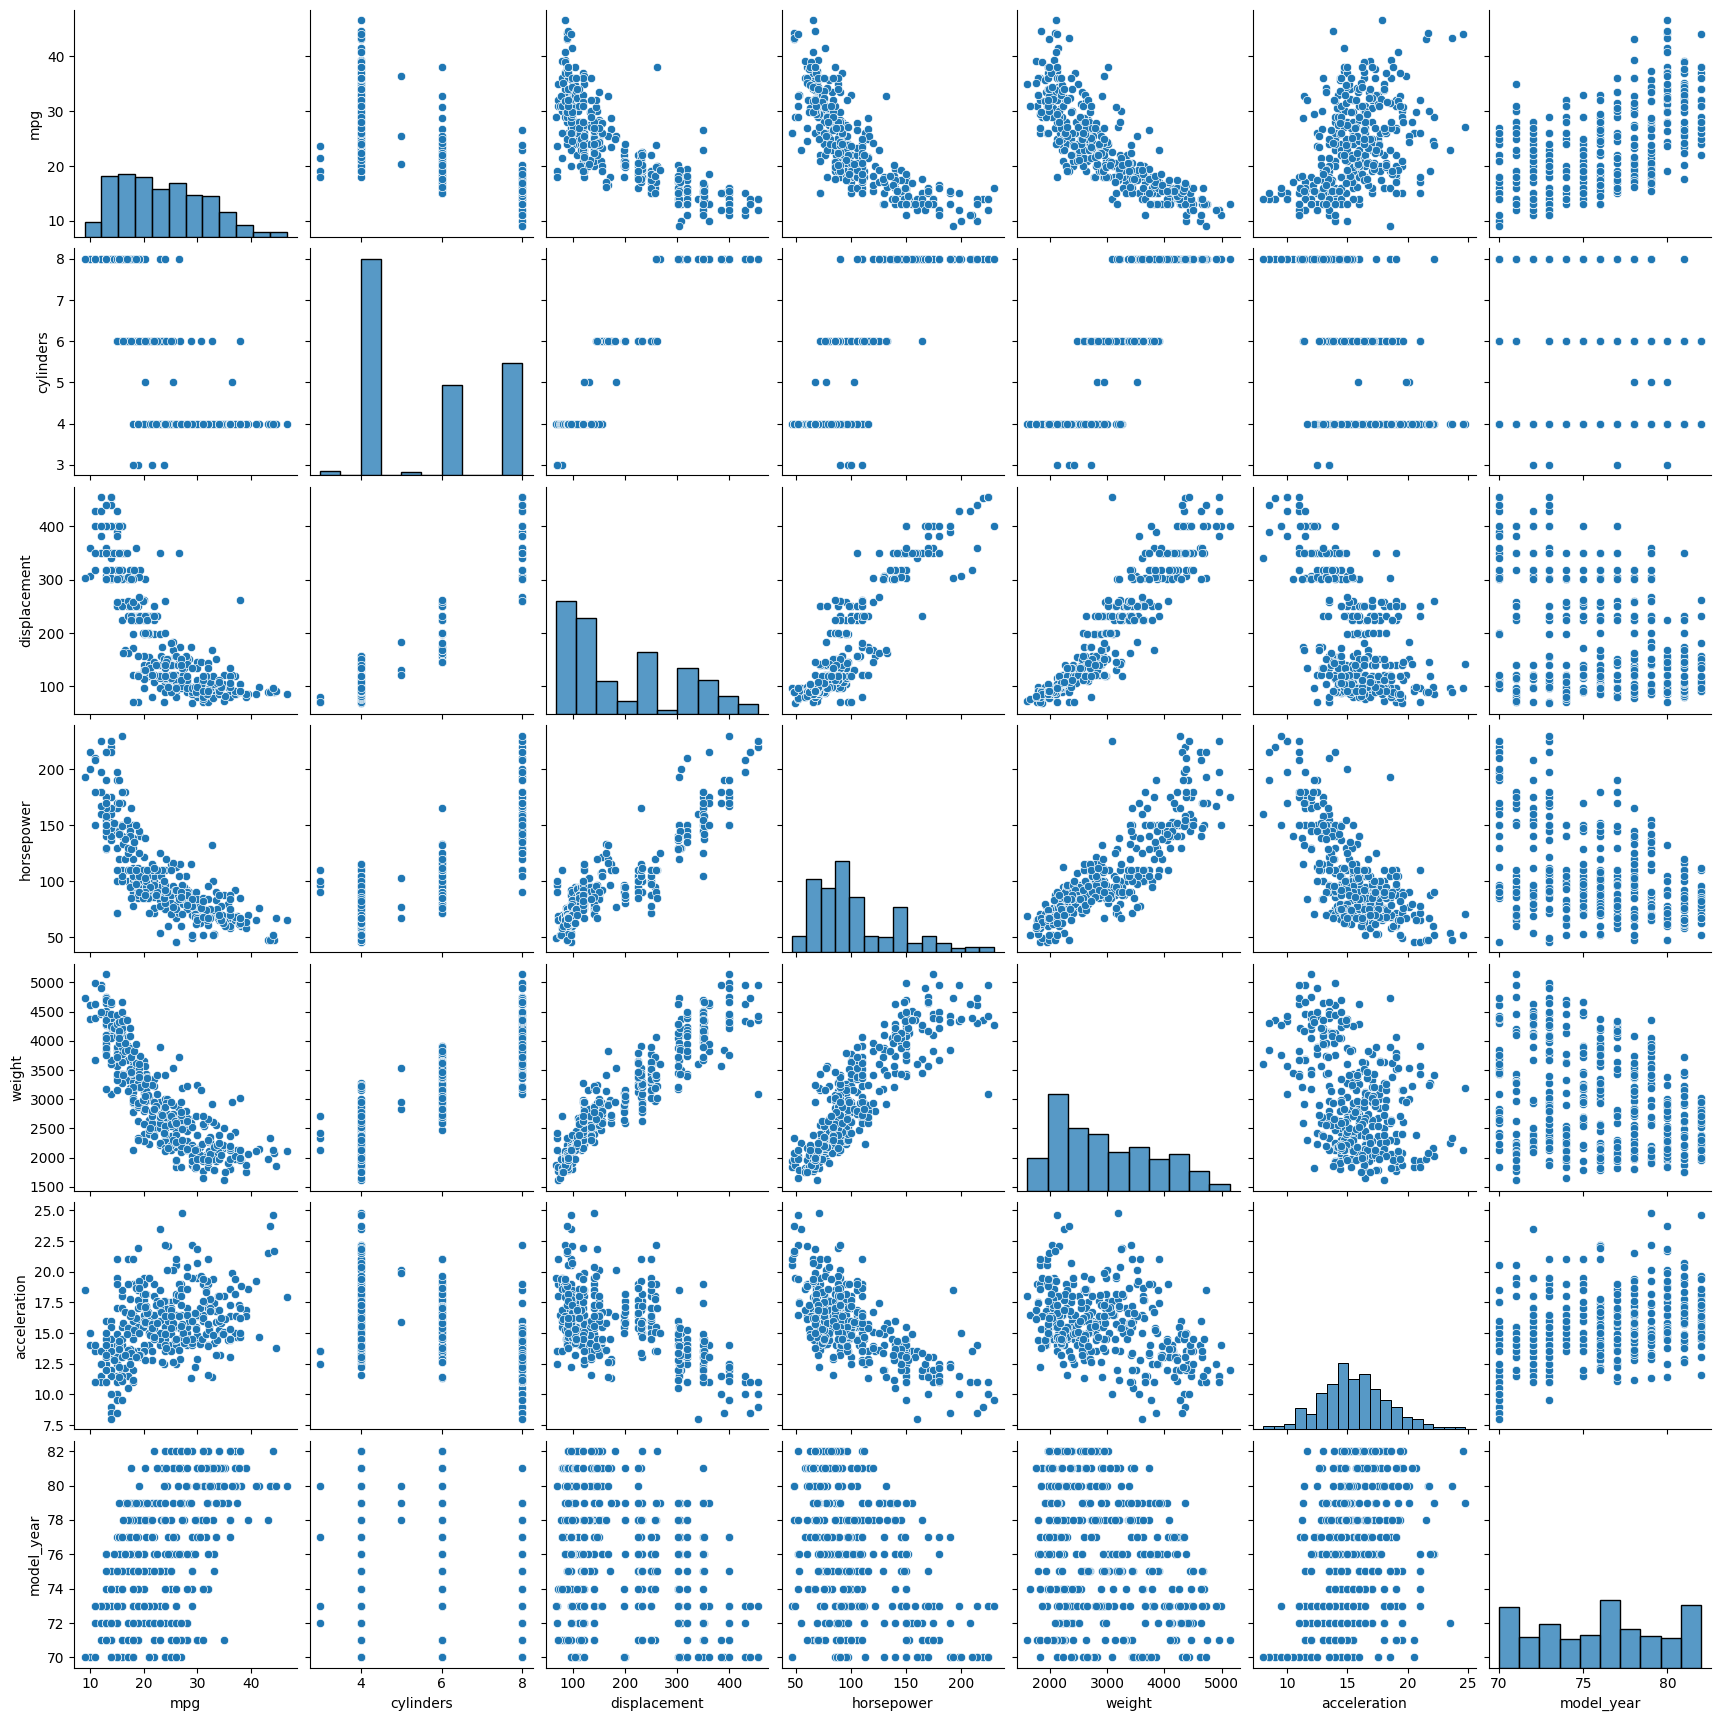

In [13]:
#Opcion 1: investigar con EDAs que columnas podrian ser las mejores para predecir mpg
sns.pairplot(df);

<Axes: >

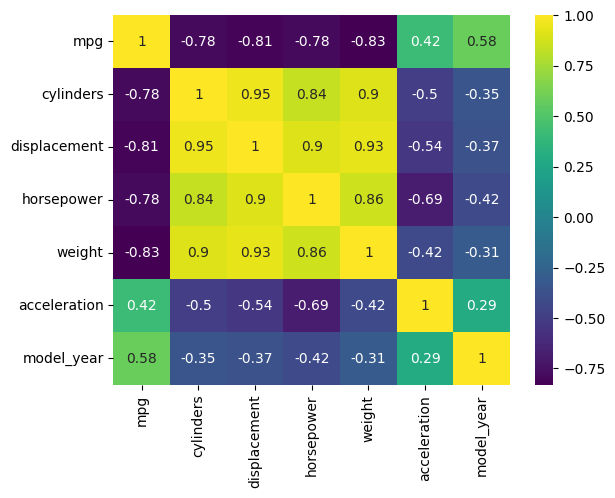

In [15]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis')

In [ ]:
#viendo el pairplot y el heatmap elegiriamos para mpg la opcion weight

C:\Users\user\AppData\Local\Temp\ipykernel_15644\3042129226.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)


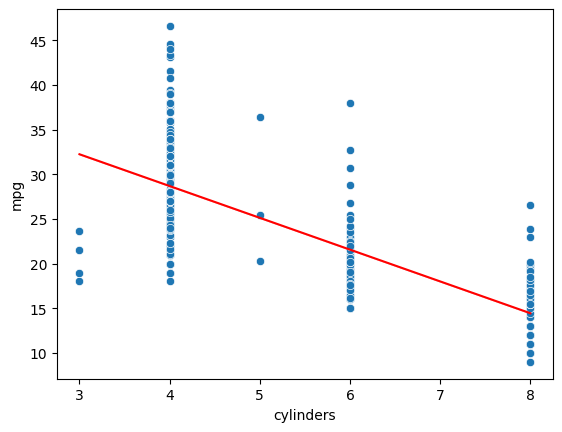

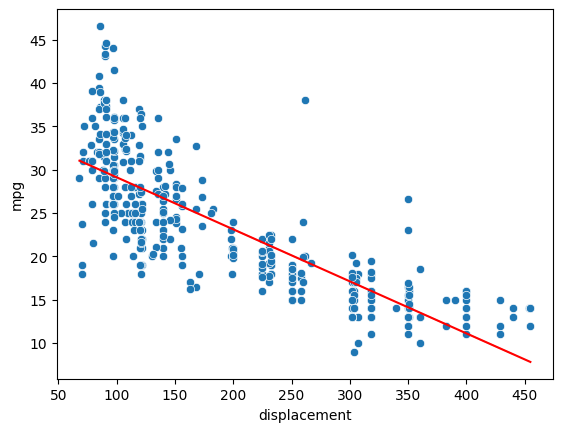

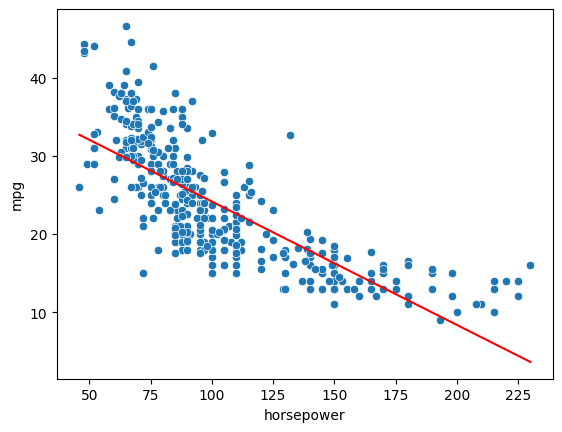

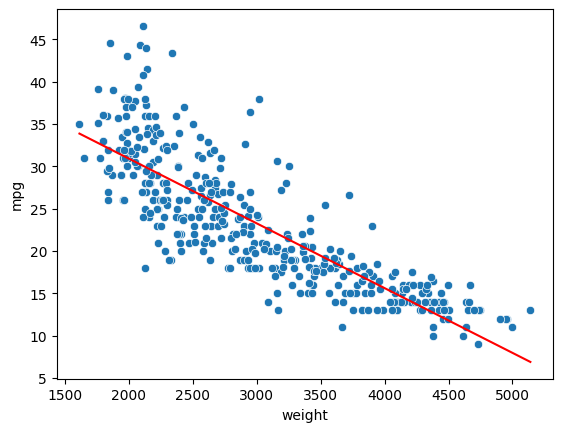

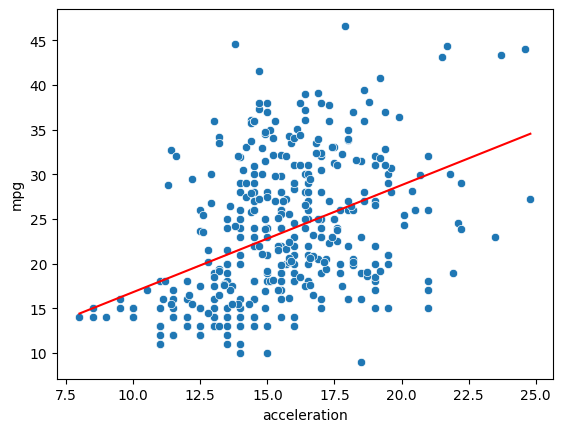

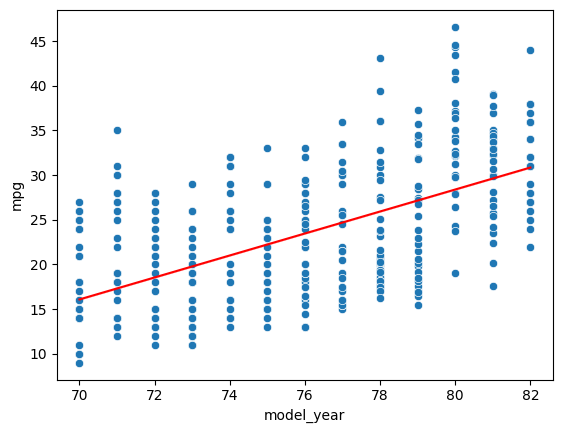

In [36]:
# Opcion 2: bucle for que itere todas las columnas numericas y las use una por una como X
# almacenando resultados en un DF
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE'])

predictores = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for predictor in predictores:
    X = df[[predictor]]
    y = df['mpg']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    df_resultados_predictor = pd.DataFrame({'Modelo': f'RLS {predictor}',
                                            'R2': [r2],
                                            'MAE': [mae],
                                            'RMSE': [rmse]})
    df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)
    sns.scatterplot(x=X[predictor], y=y)
    sns.lineplot(x=X[predictor], y=y_pred, c='r')
    plt.show();



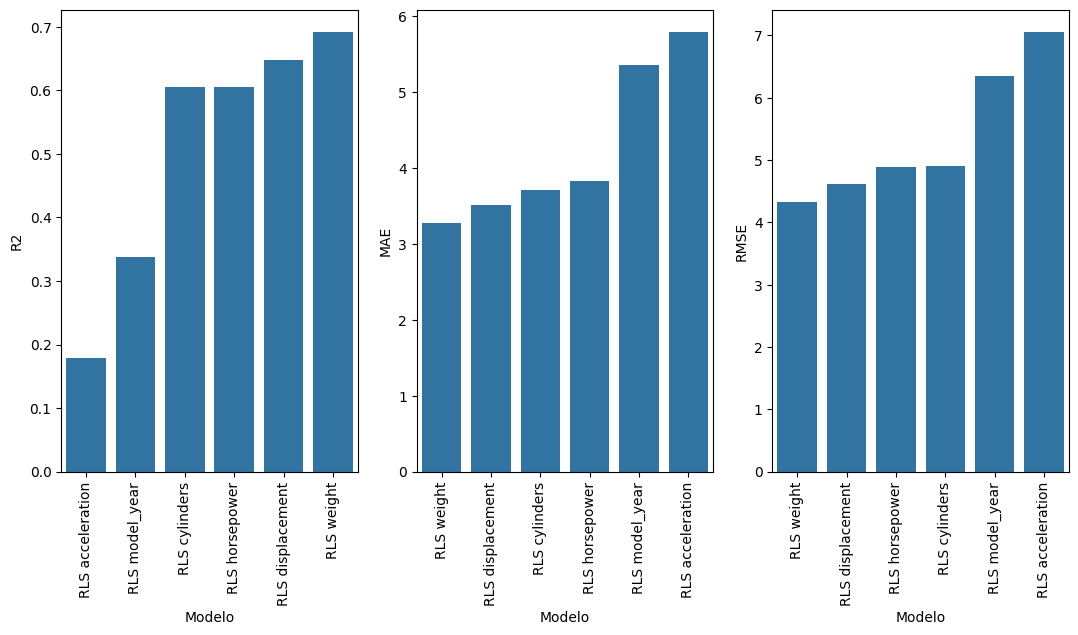

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE') #interesa el valor mas bajo
plt.xticks(rotation=45);

## Regresion lineal multiple

In [ ]:
#regresion lineal multiple para predecir la columna mpg

In [28]:
df.head()
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
#X = df.drop(['mpg', 'origin', 'name'], axis=1) #equivale al anterior
y = df['mpg']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
df_resultados_predictor = pd.DataFrame({'Modelo': f'RL Multiple',
                                            'R2': [r2],
                                            'MAE': [mae],
                                            'RMSE': [rmse]})
df_resultados = pd.concat([df_resultados, df_resultados_predictor], ignore_index=True)

df_resultados

    

,Modelo,R2,MAE,RMSE
0,RLS cylinders,0.604689,3.711287,4.901039
1,RLS displacement,0.648229,3.506273,4.623261
2,RLS horsepower,0.605948,3.827587,4.893226
3,RLS weight,0.692630,3.278702,4.321645
4,RLS acceleration,0.179207,5.795118,7.062126
5,RLS model_year,0.337028,5.355736,6.346968
6,RL Multiple,0.809255,2.618264,3.404434


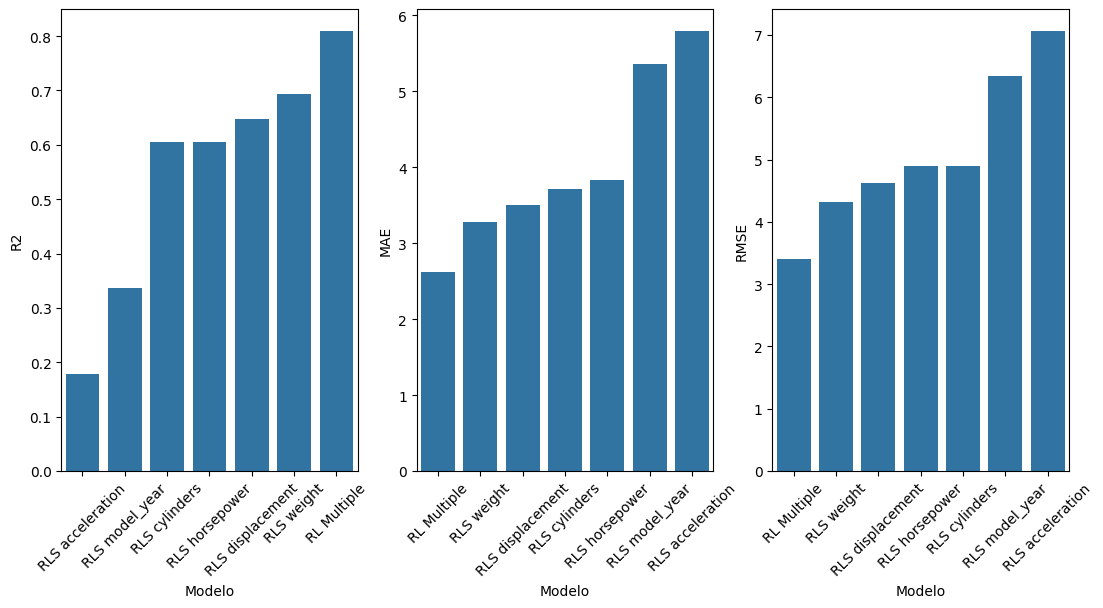

In [29]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
sns.barplot(df_resultados.sort_values('R2'), x='Modelo', y='R2') #interesa valor mas alto
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
sns.barplot(df_resultados.sort_values('MAE'), x='Modelo', y='MAE') #interesa valor mas bajo
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
sns.barplot(df_resultados.sort_values('RMSE'), x='Modelo', y='RMSE') #interesa el valor mas bajo
plt.xticks(rotation=45);

In [ ]:
#get_dummies sobre el origin

In [39]:
df['origin'].unique()


array(['usa', 'japan', 'europe'], dtype=object)

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#regresion lineal simple para predecir la columna body_mass_g

In [ ]:
#regresion lineal multiple para predecir la columna body_mass_g

In [ ]:
df = sns.load_dataset('diamonds')